# Using Machine Learning To Predict Diagnosis of a Breast Cancer
  

## 1. Identify the problem
Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

### 1.1 Expected outcome
Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:
* 1= Malignant (Cancerous) - Present
* 0= Benign (Not Cancerous) -Absent

### 1.2 Objective 
Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning this is a classification problem. 
        
> *Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period.  To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.*

### 1.3 Identify data sources
The [Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains **569 samples of malignant and benign tumor cells**. 
* The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively. 
* The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant. 

 

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [2]:
# load dataset
df = pd.read_csv('data.csv')
df.shape

(569, 33)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df = df.drop("id", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Data Preprocessing (EDA)

In [5]:
df.isna().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [6]:
df = df.drop('Unnamed: 32', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
# count of malignant and benignate
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

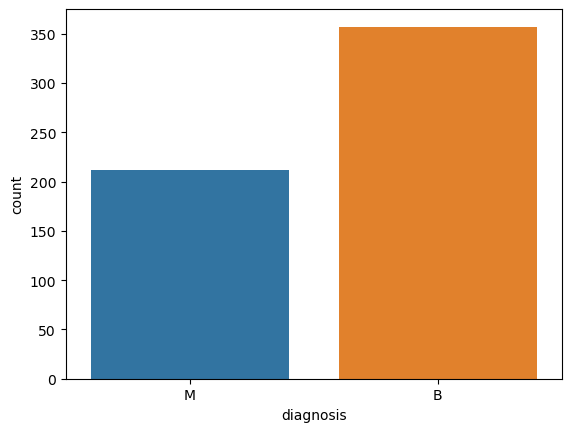

In [8]:
sns.countplot(df, x="diagnosis")
plt.show()

In [9]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [42]:
# encoding Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df.iloc[:,0] = le.fit_transform(df.iloc[:,0].values)
df[df.columns[0]] = le.fit_transform(df.iloc[:, 0].values)


In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Separate columns into smaller dataframes to perform visualization

In [12]:
data_mean=df.iloc[:,1:11]

<Axes: >

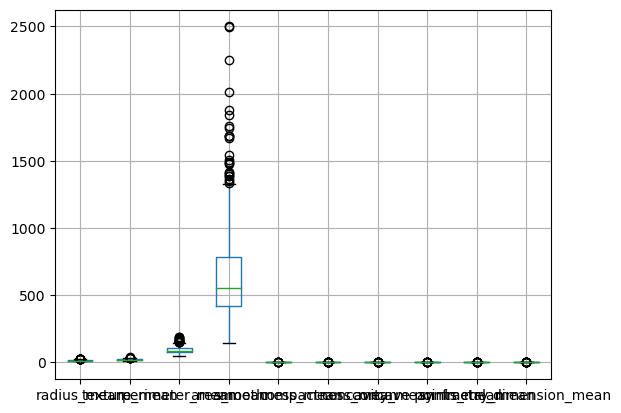

In [13]:
data_mean.boxplot()

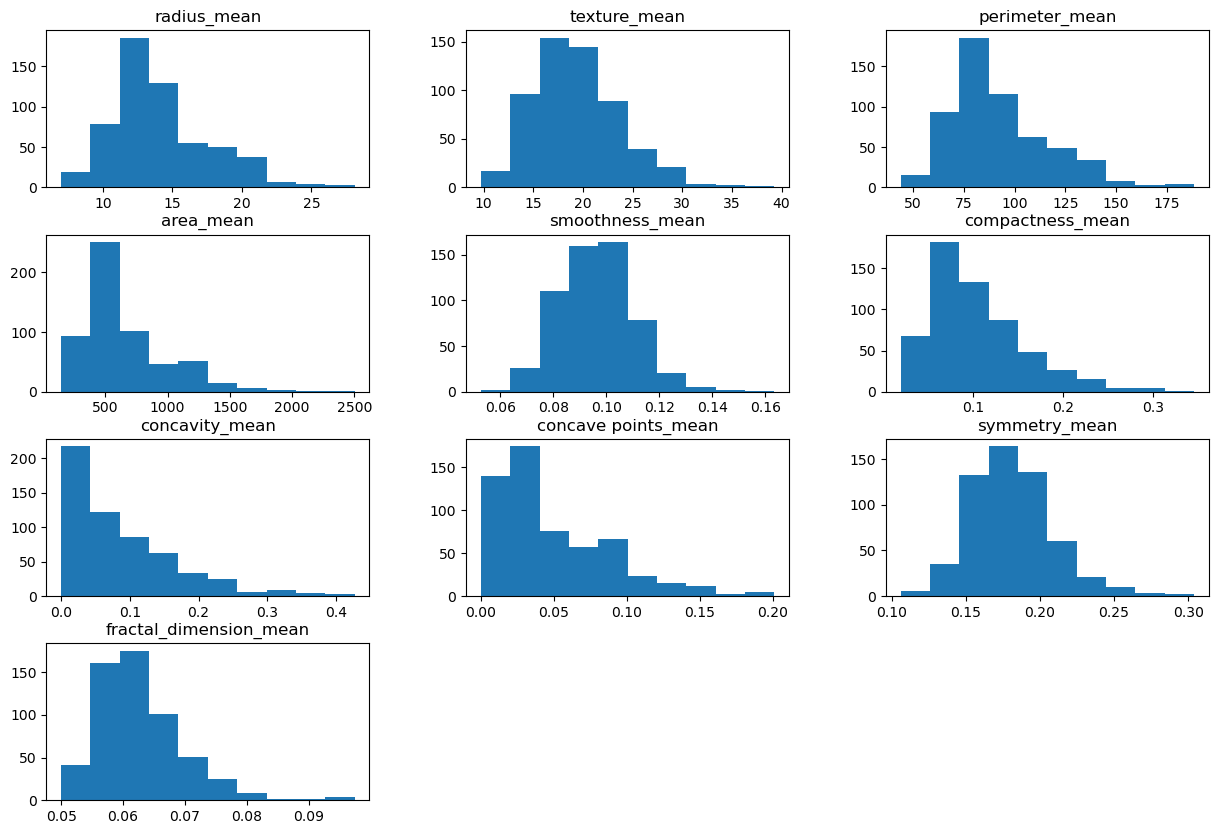

In [14]:
#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

<Axes: >

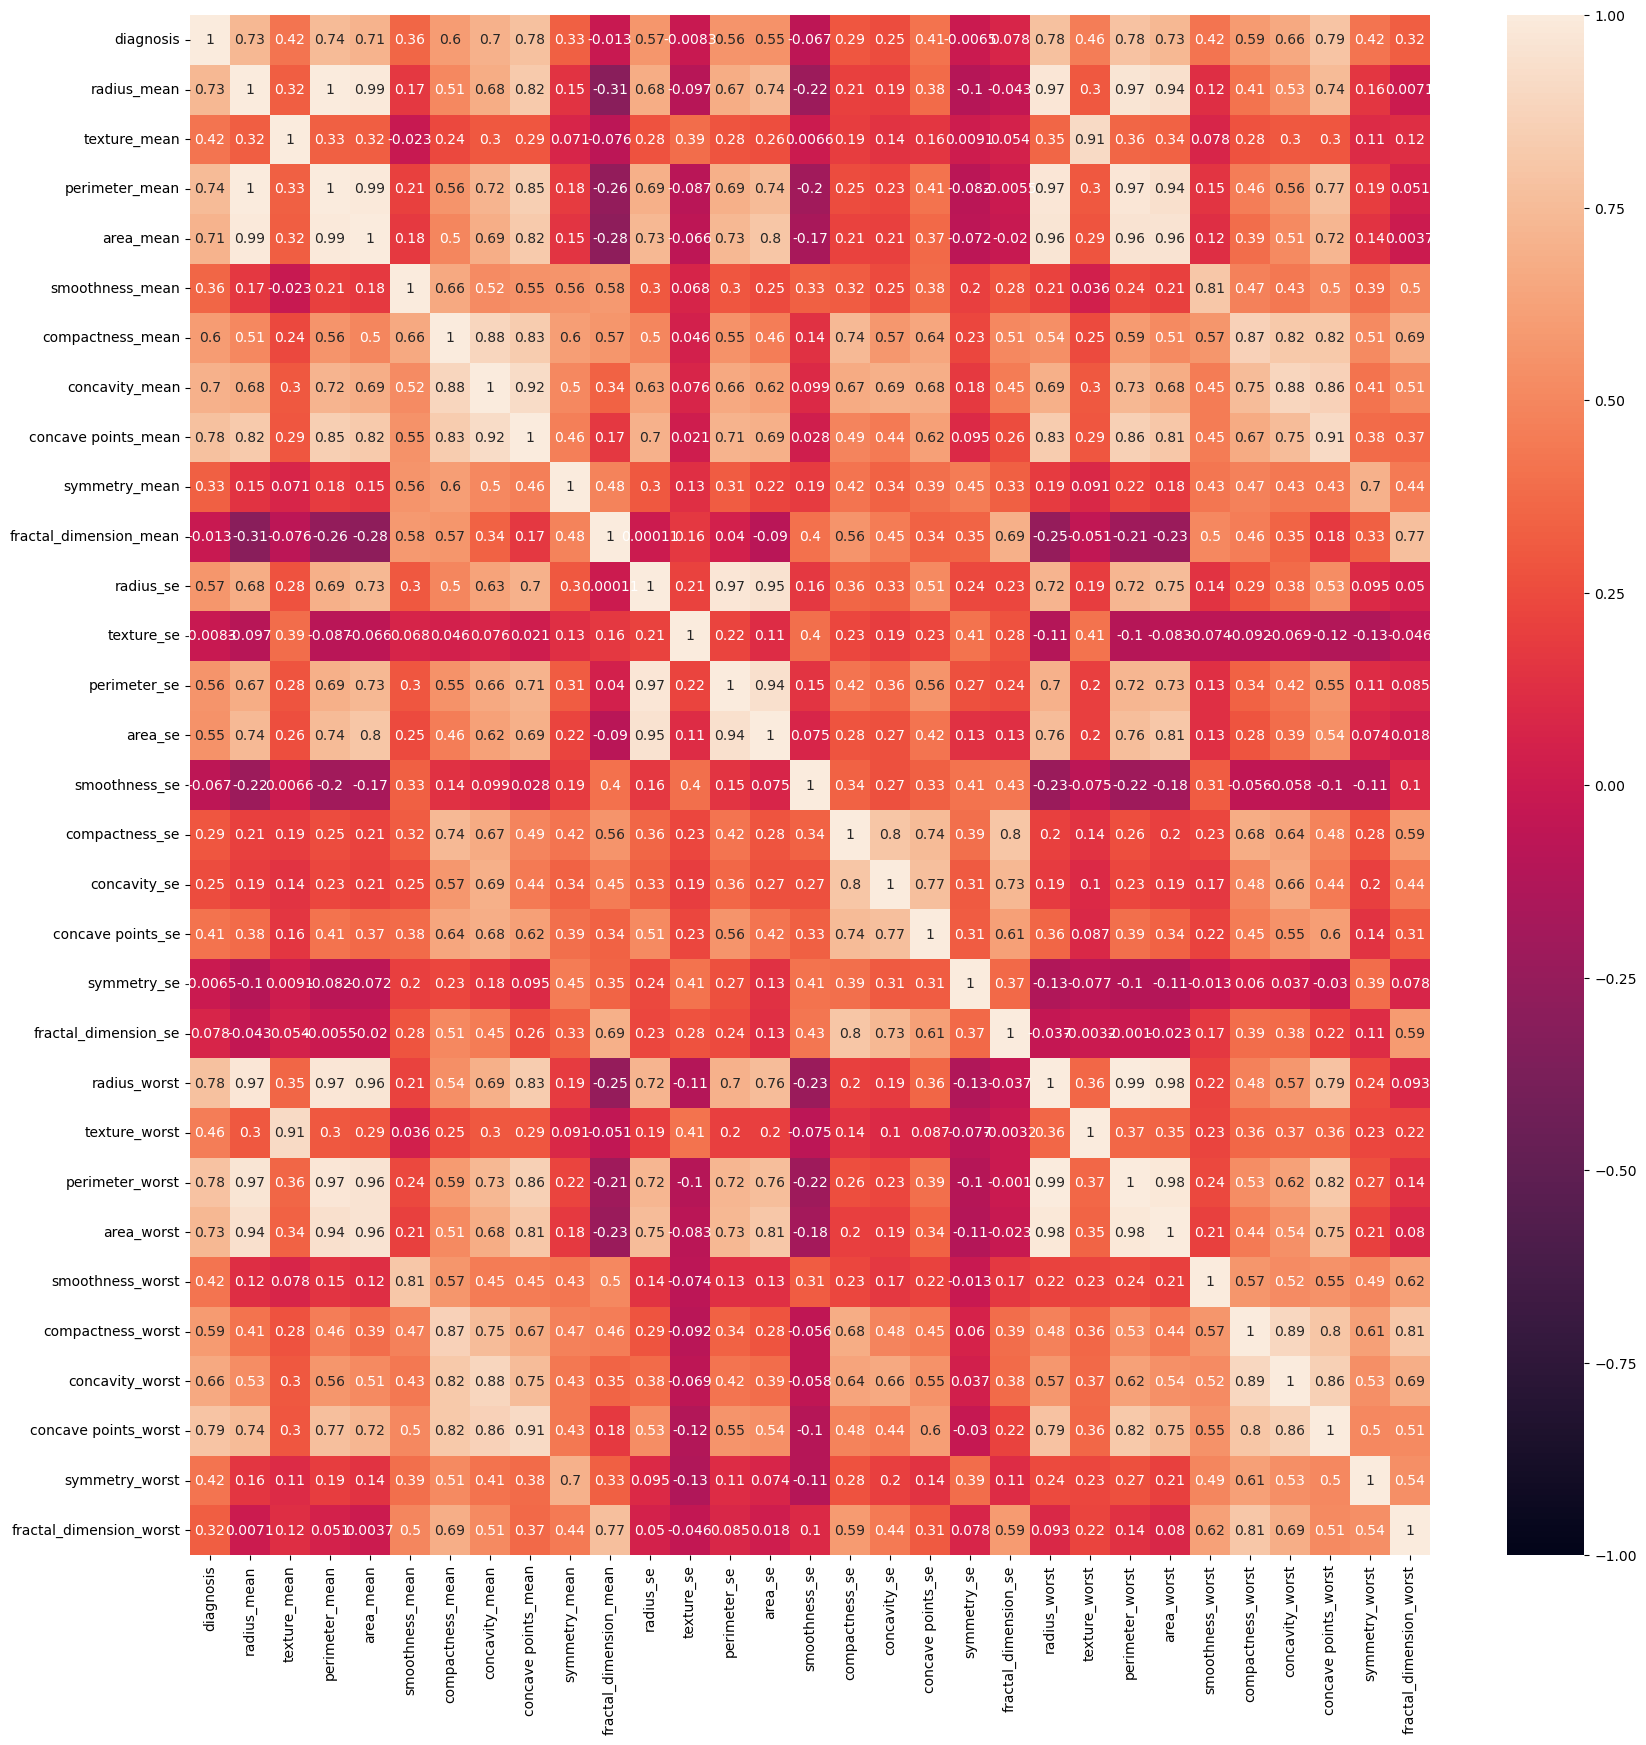

In [15]:
#Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, vmax=1.0, vmin=-1.0)

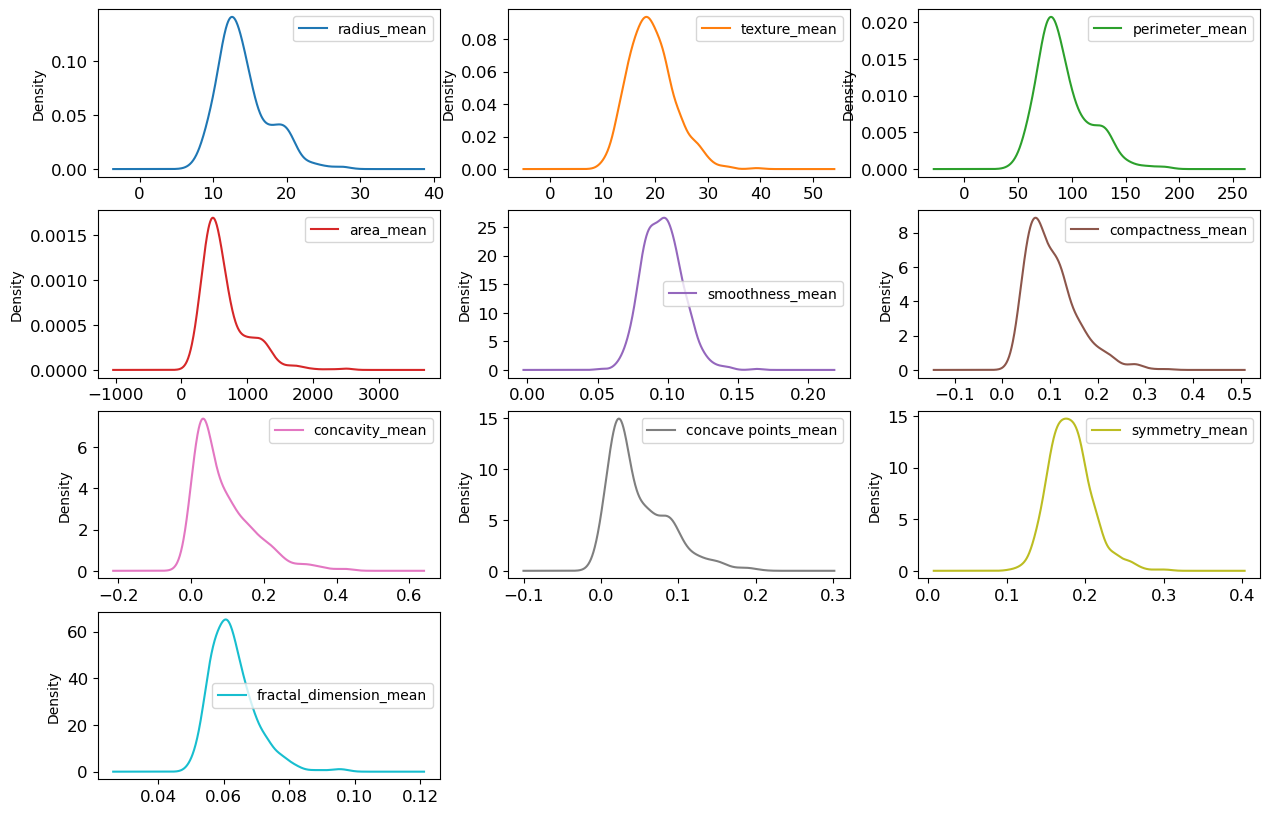

In [16]:
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

# Splitting the data

In [17]:
# train test split
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis'].values

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [20]:
df.shape

(569, 31)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


# Data Normalization 

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

# Model building

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [24]:
# convert y_train and y_test data into int from object 
y_train = y_train.astype(int)
y_test = y_test.astype(int)

## 1. Logistic Regression

In [29]:
# Logistic Regression

# train the model
reg = LogisticRegression()
reg.fit(X_train_scale,y_train)

# prediction on test data 
y_pred = reg.predict(X_test_scale)

# evalation 
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------")
print("Accuracy : ")
print(accuracy_score(y_test, y_pred))
print("-----------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[71  0]
 [ 2 41]]
-----------------------------------------------
Accuracy : 
0.9824561403508771
-----------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## 2. Suport Vector Machine 

In [30]:
from sklearn.svm import SVC
# Support Vector Machine

# train the model
svc = SVC()
svc.fit(X_train_scale,y_train)

# prediction on test data 
y_pred = svc.predict(X_test_scale)

# evalation 
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------")
print("Accuracy : ")
print(accuracy_score(y_test, y_pred))
print("-----------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[70  1]
 [ 2 41]]
-----------------------------------------------
Accuracy : 
0.9736842105263158
-----------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# 3. Naive Bayes 

In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scale, y_train)

# prediction on test data
y_pred = nb.predict(X_test_scale)

# evalation 
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------")
print("Accuracy : ")
print(accuracy_score(y_test, y_pred))
print("-----------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[70  1]
 [ 3 40]]
-----------------------------------------------
Accuracy : 
0.9649122807017544
-----------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# 4.Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train_scale, y_train)

# prediction on test data
y_pred = DT.predict(X_test_scale)

# evalation 
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------")
print("Accuracy : ")
print(accuracy_score(y_test, y_pred))
print("-----------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[67  4]
 [ 4 39]]
-----------------------------------------------
Accuracy : 
0.9298245614035088
-----------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



# 5. Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
RF = DecisionTreeClassifier()
RF.fit(X_train_scale, y_train)

# prediction on test data
y_pred = RF.predict(X_test_scale)

# evalation 
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------")
print("Accuracy : ")
print(accuracy_score(y_test, y_pred))
print("-----------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[68  3]
 [ 3 40]]
-----------------------------------------------
Accuracy : 
0.9473684210526315
-----------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
# 6. XGBoost

In [43]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train_scale, y_train)

# prediction on test data
y_pred = xg.predict(X_test_scale)

# evalation 
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------")
print("Accuracy : ")
print(accuracy_score(y_test, y_pred))
print("-----------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[69  2]
 [ 3 40]]
-----------------------------------------------
Accuracy : 
0.956140350877193
-----------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [59]:
# Create DataFrames for each algorithm
logi_df = pd.DataFrame({
    'Algorithm': ['Logistic Regression'],
    'Confusion Matrix': [confusion_matrix(y_test, y_pred)],
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Classification Report': [classification_report(y_test, y_pred)]
})

svc_df = pd.DataFrame({
    'Algorithm': ['Support Vector Machine'],
    'Confusion Matrix': [confusion_matrix(y_test, y_pred)],
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Classification Report': [classification_report(y_test, y_pred)]
})
nb_df = pd.DataFrame({
    'Algorithm': ['Naive Bayes'],
    'Confusion Matrix': [confusion_matrix(y_test, y_pred)],
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Classification Report': [classification_report(y_test, y_pred)]
})

DT_df = pd.DataFrame({
    'Algorithm': ['Dicision Tree'],
    'Confusion Matrix': [confusion_matrix(y_test, y_pred)],
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Classification Report': [classification_report(y_test, y_pred)]
})
RF_df = pd.DataFrame({
    'Algorithm': ['Random Forest'],
    'Confusion Matrix': [confusion_matrix(y_test, y_pred)],
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Classification Report': [classification_report(y_test, y_pred)]
})

xgb_df = pd.DataFrame({
    'Algorithm': ['XGBOOST'],
    'Confusion Matrix': [confusion_matrix(y_test, y_pred)],
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Classification Report': [classification_report(y_test, y_pred)]
})

# Concatenate the DataFrames
result_df = pd.concat([logi_df, svc_df, nb_df, DT_df, RF_df, xgb_df], ignore_index=True)

# Display the result DataFrame
from tabulate import tabulate
print(tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False))

+------------------------+------------------+-------------------+-------------------------------------------------------+
|       Algorithm        | Confusion Matrix |     Accuracy      |                 Classification Report                 |
+------------------------+------------------+-------------------+-------------------------------------------------------+
|  Logistic Regression   |     [[69  2]     | 0.956140350877193 |        precision    recall  f1-score   support        |
|                        |     [ 3 40]]     |                   |                                                       |
|                        |                  |                   |            0       0.96      0.97      0.97        71 |
|                        |                  |                   |            1       0.95      0.93      0.94        43 |
|                        |                  |                   |                                                       |
|                       